### Fatec Mogi Mirim
# Projeto de IA - 1 Semestre de 2020

## Bibliotecas
- Pandas
  - É uma lib Python focada em manipulação de dados
  - [Site Oficial da Pandas](https://pandas.pydata.org/)
  - Para instalar a lib utilize o comando abaixo:
  ```
  pip install pandas
  ```
- NumPy
  - É uma lib Python de codigo aberto focado em processamento computacional numerico
  - [Site Oficial da NumPy](https://numpy.org/)
  - Para instalar a lib utilize o comando abaixo:
  ```
  pip install numpy
  ```
- Matplotlib
  - Lib Python focada em criação de gráficos
  - [Site Oficial da Matplotlib](https://matplotlib.org/)
  - Para instalar a lib utilize o comando abaixo:
  ```
  pip install matplotlib
  ```
- Seaborn
  - Lib Python baseada em Matplotlib focada em visualização de gráficos estatisticos
  - [Site Oficial da Seaborn](https://matplotlib.org/)
  - Para instalar a lib utilize o comando abaixo:
  ```
  pip install seaborn
  ```
- Scikit-learn (Sklearn)
  - Lib Python que oferece uma gama de ferramentas para fazer analise de dados
  - [Site Oficial do Scikit-learn](https://scikit-learn.org/stable/)
  - Para instalar a lib utilize o comando abaixo:
  ```
  pip install sklearn
  ```
  

In [1]:
import pandas as pd            
import numpy as np              
import matplotlib.pyplot as plt
import seaborn as sns

### Importando os Dados Base

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer
cancer.keys()
print(cancer['DESCR'])
print(cancer['target_names'])
print(cancer['target'])
print(cancer['feature_names'])
print(cancer['data'])



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Organizando a Tabela de forma visivel

In [8]:
cancer['data'].shape

df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


### Visualizar os dados com a Lib MatPlot

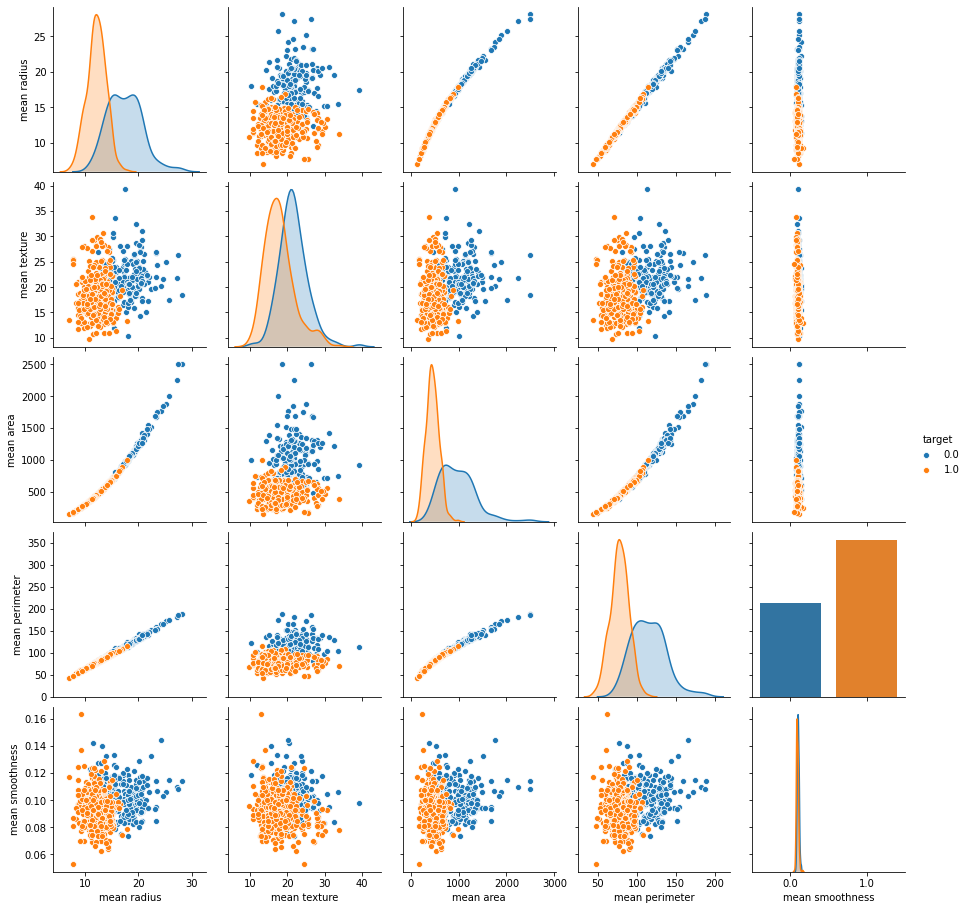

In [17]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )
sns.countplot(df_cancer['target'], label = "Count")

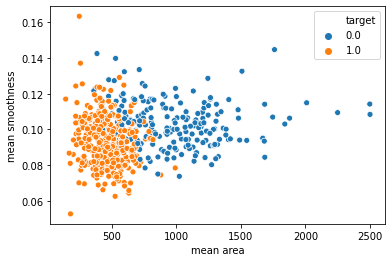

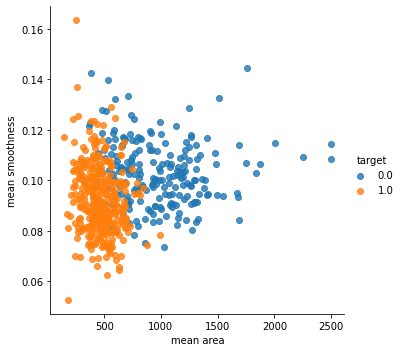

In [13]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)
sns.lmplot('mean area', 'mean smoothness', hue ='target', data = df_cancer, fit_reg=False)

### Checando a correlação entre as variaveis

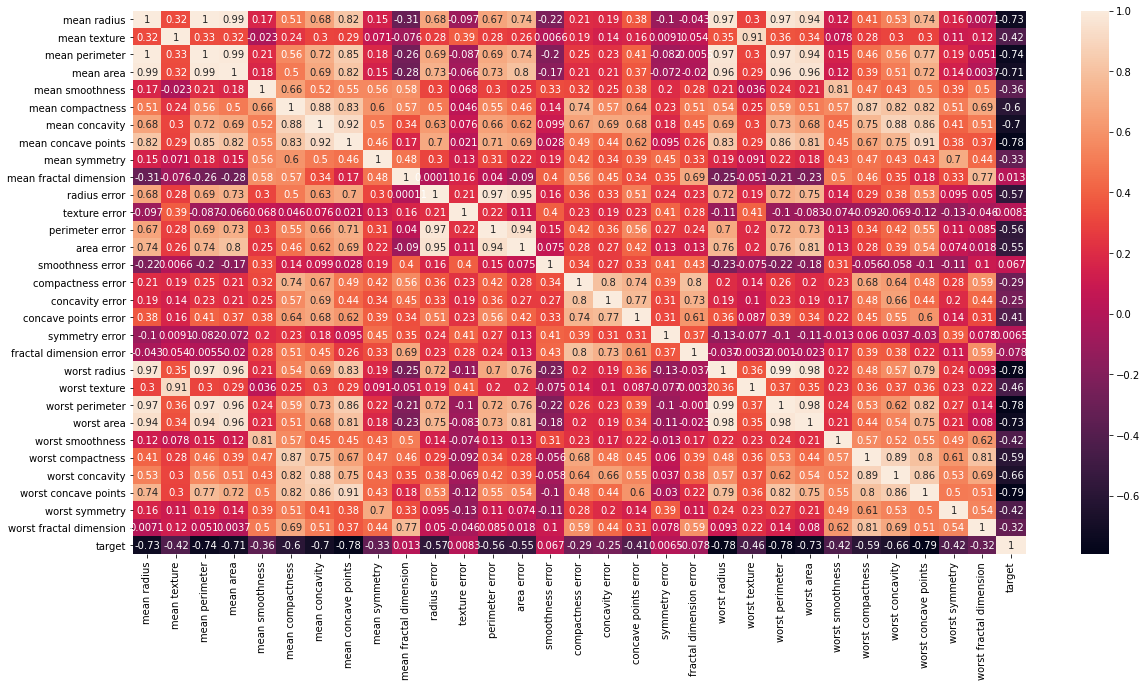

In [18]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_cancer.corr(), annot=True)

### Treinando e avaliando o modelo

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



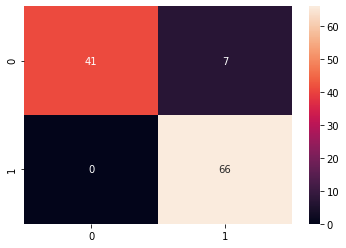

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X = df_cancer.drop(['target'],axis=1)
y = df_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

svc_model = SVC()
svc_model.fit(X_train, y_train)
# Avaliando o modelo
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict))

### 1º Melhoramento do Modelo

Realizando a Normalização de dados através do dimensionamento de recursos (Tipo de normalização baseada em Uni) que classifica os valores dentro do intervalo [0,1].
Tem por base a seguinte equação:
```
X '= (X - Xmin) / (Xmáx - Xmin)
```

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



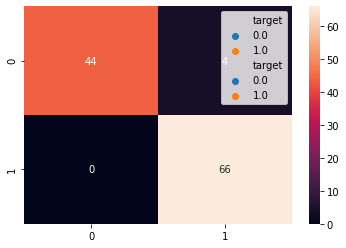

In [26]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'], hue = y_train)

min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test,y_predict))

### 2º Melhoramento do Modelo

- Parâmetro C: controla o trade-off entre a classificação de pontos de treinamento corretamente e com um limite de decisão suave:
    - O pequeno C (solto) reduz o custo (penalidade) da classificação incorreta (margem suave)
    - Grande C (estrito) eleva o custo da classificação incorreta (margem bruta), forçando o modelo para explicar os dados de entrada mais restritos e potencialmente sobrepostos
     
     
     
- Parâmetro gama: controla até que ponto a influência de um único conjunto de treinamento atinge
    - Grande gama: alcance próximo (pontos de dados mais próximos têm alto peso)
    - Gama pequena: longo alcance (mais solução de generalização)

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,y_train)

grid.best_params_
grid.best_estimator_

grid_predictions = grid.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_predictions)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.934, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.3s finished


              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



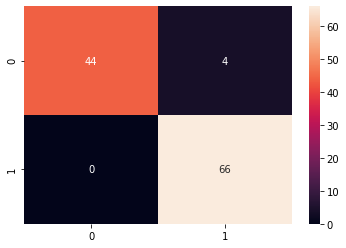

In [31]:
sns.heatmap(cm, annot=True)

print(classification_report(y_test,grid_predictions))